## Set up

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx
import descartes as dsc
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, SingleIntervalTicker,\
    Slider, Button, Label, CategoricalColorMapper, Legend, Circle, CheckboxButtonGroup, Select, NumeralTickFormatter

## Reading Geopandas data

In [5]:
dr = os.getcwd()
fdr = 'Neighbourhood boundaries'
in_f = 'neighbourhoods.geojson'

target = os.path.join(dr, fdr, in_f)

df = gp.read_file(target)

In [6]:
df

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ..."
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ..."
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ..."
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ..."
...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ..."
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ..."
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ..."
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ..."


In [7]:
df.head(1).T

,0
neighbourhood,Bayswater
neighbourhood_group,Queens
geometry,"(POLYGON ((-73.76670799999999 40.614911, -73.7..."


## Checking coordinate ref system

In [8]:
df.crs

{'init': 'epsg:4326'}

In [9]:
# encode the data so as they map onto the Web Mercator scale

df = df.to_crs(epsg=3857)

In [10]:
# data preview

df.head(1).T

,0
neighbourhood,Bayswater
neighbourhood_group,Queens
geometry,(POLYGON ((-8211672.372056099 4955705.98588607...


## Filters for Manhattan

In [11]:
df1 = df[df.neighbourhood_group == 'Manhattan']
df1

,neighbourhood,neighbourhood_group,geometry
18,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
43,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823..."
52,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823..."
53,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823..."
80,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823..."
87,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823..."
94,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
96,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823..."
107,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823..."
117,Greenwich Village,Manhattan,"MULTIPOLYGON (((-8236691.650 4972853.241, -823..."


In [35]:
dr = os.getcwd()
fdr = 'Geo'
in_f = 'listings.geojson'

target = os.path.join(dr, fdr, in_f)

dtf = gp.read_file(target)

In [36]:
entire = dtf[dtf.room_type == 'Entire home/apt']
man = entire[entire.neighbourhood_group == 'Manhattan']
man1 = man[man.availability_365 > 100]
man1.crs

{'init': 'epsg:4326'}

In [37]:
man1 = man1.to_crs(epsg=3857)
man1.crs

{'init': 'epsg:3857', 'no_defs': True}

In [38]:
nh = pd.DataFrame(man1.groupby('neighbourhood')['price'].aggregate(np.mean))
nh

,price
neighbourhood,
Battery Park City,850.055556
Chelsea,333.712838
Chinatown,308.450000
Civic Center,200.400000
East Harlem,204.918660
East Village,259.864780
Financial District,274.015837
Flatiron District,530.695652
Gramercy,404.487805


In [39]:
df_price = pd.merge(df1, nh, on='neighbourhood')
df_price.set_index('price')

,neighbourhood,neighbourhood_group,geometry,center
price,,,,
850.055556,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823...",POINT (-8239432.775 4969844.270)
308.450000,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823...",POINT (-8237164.985 4970509.333)
333.712838,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823...",POINT (-8237621.507 4975037.983)
200.400000,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823...",POINT (-8237959.420 4970228.675)
204.918660,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823...",POINT (-8231030.817 4982430.379)
259.864780,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823...",POINT (-8235683.762 4972036.042)
274.015837,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823...",POINT (-8238664.333 4969219.182)
530.695652,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823...",POINT (-8236410.281 4974269.527)
404.487805,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823...",POINT (-8235976.094 4973452.673)


## Plotting points

In [40]:
man1.head(1).T

,7
id,5222
name,Best Hideaway
host_id,7516
host_name,Marilyn
neighbourhood_group,Manhattan
neighbourhood,East Village
room_type,Entire home/apt
price,116
minimum_nights,30
number_of_reviews,94


## Plotting data

//anaconda3/envs/data_vis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


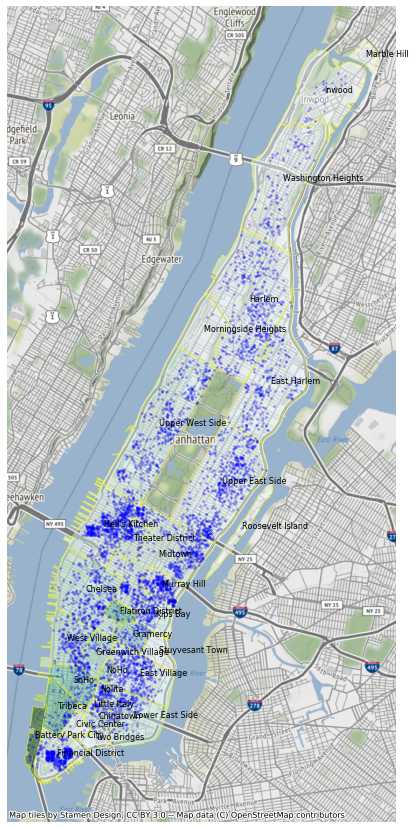

In [41]:
#plot the data
df1["center"] = df1["geometry"].centroid
df1_points = df1.copy()
df1_points.set_geometry("center", inplace = True)


variable = 'price'

ax = df_price.plot(figsize=(10, 15), column=variable, alpha=0.5, edgecolor='yellow', cmap = 'BuGn')
man1.plot(ax=ax, alpha=0.25, color='blue', markersize=3)
#ax.add_tools(HoverTool(tooltips=TOOLTIPS, show_arrow=False, point_policy='follow_mouse'))

texts = []

for x, y, label in zip(df1_points.geometry.x, df1_points.geometry.y, df1_points["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
    

    
ax.set_axis_off()
ctx.add_basemap(ax)
plt.show()